In [1]:
import numpy as np
from neural_net import NeuralNet
%load_ext autoreload
%autoreload 2
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
filename = "mnist"
nn = NeuralNet.fromMAT(filename, varname = 'tr', type="train", lam=0.0, M=300)
print np.shape(nn.T)
stepSize=0.001
nn.train(stepSize=stepSize, maxFunctionCalls=3000, varname='tr')

In [ ]:
nn.test(varname='te')
nn.validate(varname='va')

In [ ]:
scale=0.5
w_initial = [scale*(np.random.random_sample(np.shape(nn.W1)) - 0.5 ), scale*(np.random.random_sample(np.shape(nn.W2)) - 0.5)]

nn.forwardProp(nn.X, w_initial)

In [ ]:
print nn.a_hidden[:,1]
print nn.a_hidden[:,2]
print nn.z[:,1]
print nn.z[:,2]

print "y is"
print nn.y[:,1]
print nn.y[:,2]

In [ ]:
nn.test(varname='te')

In [ ]:
nn.validate(varname='va')

In [3]:
filename = "mnist"
nn_SGD = NeuralNet.fromMAT(filename, varname = 'tr', type="train", lam=0, M=50)


Actual data
can only plot data if x is two dimensional
It took 6.48498535156e-05 seconds to plot original data.
using STOCHASTIC gradient descent
 
--- Minimization Summary --- 
f_min is = 225.298705295
achieved tolerance = 0.00107868667976
numIterations = 200000
---------------------------- 
 
It took 78.9468979836 seconds to train.
Neural net classifier
1000


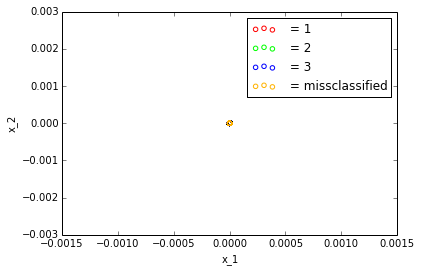

It took 0.160943984985 seconds to plot classification predictions.
1000
number of entries missclassified = 34
missclassification rate  = 0.034
### TEST DATASET ###
500
number of entries missclassified = 35
missclassification rate  = 0.07
It took 0.0242331027985 seconds to test.
### VALIDATION DATASET ###
500
number of entries missclassified = 37
missclassification rate  = 0.074
It took 0.0251400470734 seconds to validate.


In [9]:
stepSize = nn_SGD.N*20
nn_SGD.train(stepSize=stepSize, maxFunctionCalls=200000, varname='tr', useSGD=True, storeIterValues=False, tol=1e-6
            , lam=2, verbose=True)
nn_SGD.test(varname='te', verbose=False)
nn_SGD.validate(varname='va', verbose=False)

Actual data
can only plot data if x is two dimensional
It took 6.8187713623e-05 seconds to plot original data.
using STOCHASTIC gradient descent
 
--- Minimization Summary --- 
f_min is = 1075.64914592
achieved tolerance = 0.00119634404898
numIterations = 200000
---------------------------- 
 
It took 56.2364599705 seconds to train.
Neural net classifier
1000


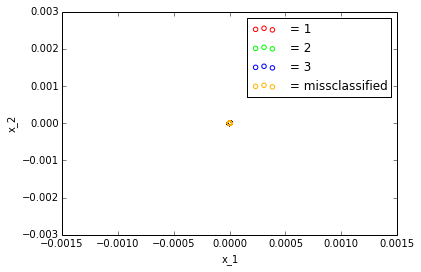

It took 0.153148174286 seconds to plot classification predictions.
1000
number of entries missclassified = 247
missclassification rate  = 0.247
### TEST DATASET ###
500
number of entries missclassified = 124
missclassification rate  = 0.248
It took 0.0203070640564 seconds to test.
### VALIDATION DATASET ###
500
number of entries missclassified = 117
missclassification rate  = 0.234
It took 0.0207238197327 seconds to validate.
Actual data
can only plot data if x is two dimensional
It took 6.29425048828e-05 seconds to plot original data.
using STOCHASTIC gradient descent
 
--- Minimization Summary --- 
f_min is = 931.748467874
achieved tolerance = 0.00137007415287
numIterations = 220000
---------------------------- 
 
It took 74.4210910797 seconds to train.
Neural net classifier
1000


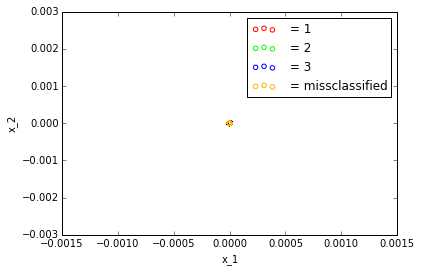

It took 0.152065038681 seconds to plot classification predictions.
1000
number of entries missclassified = 186
missclassification rate  = 0.186
### TEST DATASET ###
500
number of entries missclassified = 77
missclassification rate  = 0.154
It took 0.0219700336456 seconds to test.
### VALIDATION DATASET ###
500
number of entries missclassified = 65
missclassification rate  = 0.13
It took 0.0227088928223 seconds to validate.
Actual data
can only plot data if x is two dimensional
It took 5.31673431396e-05 seconds to plot original data.
using STOCHASTIC gradient descent
 
--- Minimization Summary --- 
f_min is = 935.153641597
achieved tolerance = 0.0013822281581
numIterations = 240000
---------------------------- 
 
It took 93.8291780949 seconds to train.
Neural net classifier
1000


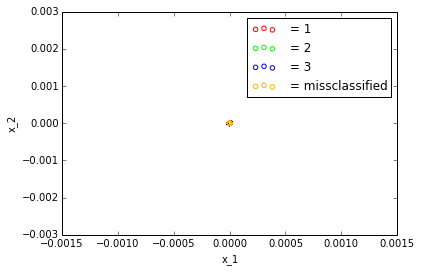

It took 0.163227796555 seconds to plot classification predictions.
1000
number of entries missclassified = 202
missclassification rate  = 0.202
### TEST DATASET ###
500
number of entries missclassified = 75
missclassification rate  = 0.15
It took 0.0250480175018 seconds to test.
### VALIDATION DATASET ###
500
number of entries missclassified = 76
missclassification rate  = 0.152
It took 0.0248730182648 seconds to validate.
Actual data

In [ ]:
lamGrid = np.array([2.0])
Trials = 2
MGrid = np.array([30, 40, 50, 60, 70, 80])
mMin = MGrid[0]
mMax = MGrid[-1]
trainCER = 0.0*MGrid
testCER = 0.0*MGrid
validateCER = 0.0*MGrid
maxFunctionCalls=200000
maxFunctionCallsBig=300000
trainTime = 0.0*MGrid


for i, m in enumerate(MGrid):
    for lam in lamGrid:            
        alpha = (m - mMin)*1.0/(mMax - mMin)
        mfc = maxFunctionCalls*(1-alpha) + alpha*maxFunctionCallsBig
        mfc = np.ceil(mfc)
        nn_SGD = NeuralNet.fromMAT(filename, varname = 'tr', type="train", lam=lam, M=m)
        stepSize = nn_SGD.N*20
        nn_SGD.train(stepSize=stepSize, maxFunctionCalls=mfc, varname='tr', useSGD=True, storeIterValues=False,
                tol=1e-6, verbose=True)
        trainTime[i] = nn_SGD.trainingTime
        TrainCER[i] = nn_SGD.missclassifiedRate
        nn_SGD.test(varname='te', verbose=False)
        testCER[i] = nn_SGD.missclassifiedRate
        
        nn_SGD.validate(varname='va', verbose=False)
        validateCER[i] = nn_SGD.missclassifiedRate


Training CER vs. M (number of hidden nodes)
Test CER vs. M (number of hidden nodes)
Validation CER vs. M (number of hidden nodes)


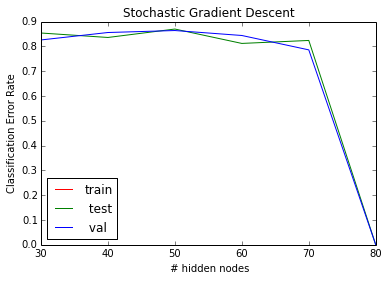

Training time vs. M (number of hidden nodes)


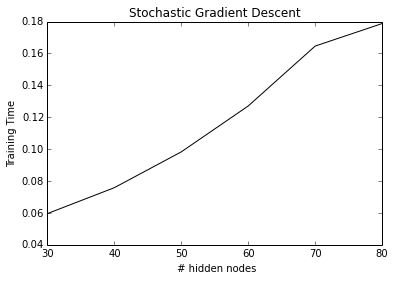

In [27]:
print "Training CER vs. M (number of hidden nodes)"    
plt.plot(MGrid, trainCER, 'red', label = 'train')

print "Test CER vs. M (number of hidden nodes)"    
plt.plot(MGrid, testCER, 'green', label=' test')

print "Validation CER vs. M (number of hidden nodes)"    
plt.plot(MGrid, validateCER, 'blue', label=" val")

plt.xlabel(' # hidden nodes')
plt.ylabel('Classification Error Rate')
plt.legend(loc='best')
plt.title('Stochastic Gradient Descent')
plt.show()


print "Training time vs. M (number of hidden nodes)"    
plt.xlabel(' # hidden nodes')
plt.ylabel('Training Time')
plt.title('Stochastic Gradient Descent')
plt.plot(MGrid, trainTime, 'black')
plt.show()

In [20]:
a = np.array([1,2,3])
print a[-1]

3
